# ➡️ **Project 1:  Data Storytelling Analysis and EDA on the Titanic Dataset**

# Step 1: Importing necessary Libraries

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

# Step 2 Loading Dataset And Initial Inspection:

In [48]:
# tdf = titanic_data_frame
tdf = pd.read_csv("/home/akash/VScode/ML/GFG_plus_my_own_research/GFG/Datasets/Titanic_Dataset/Titanic-Dataset.csv")

#brief view of the dataset

print("\nFirst 5 Rows Of The Titanic Dataset:\n")
tdf.head()


First 5 Rows Of The Titanic Dataset:



PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [49]:
print("\nLast Five Rows Of The Dataset:\n")

tdf.tail()


Last Five Rows Of The Dataset:



PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [50]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### <u>**Insights(Interpretation) of `.info()`**</u>

1️⃣ Dataset contains **891 rows and 12 columns.**<br>
2️⃣ Columns : **Age**, **Cabin** and **Embarked** are having **missing values**.

In [51]:
tdf.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#### <u>**Insights(Interpretation of `.describe()`)**</u>

1️⃣ **Survived :** around 38 percent people Survived on Titanic<br>
2️⃣ **Pclass** : **most** of the **passengers** took **2nd and 3rd** Passenger class tickets, since they are cheaper than 1st class<br>
3️⃣ **Age** : the age of people on that ship ranged from **4 months to 80 max**, indicating wide demographics among passengers<br>
4️⃣ **SibSp, Parch and Fare** : All of them are having **highly skewed distribution of data, right skewed**, indicated by their min, median and max.  

# Step 3: DataCleaning 

Looking for missing values 👍

In [52]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
null_counts = tdf.isnull().sum()

In [54]:
print("Columns With Missing Values:", end = " ")

null_cols = null_counts[ null_counts > 0].index.tolist()

print(*null_cols, sep = ", ")

Columns With Missing Values: Age, Cabin, Embarked


## **Filling missing values in `Age`**

In [55]:
median = tdf['Age'].median()

# tdf.loc[:, 'Age'].fillna(median)
tdf["Age"] = tdf["Age"].fillna(median)

##### **Since Age can be skewed in such scenarios `median` is better measure for the centrality of the data rather than mean because `median` is less affteced by outliers while mean is stretched towards the outliers's direction**
##### **So we are using median to fill the null values in the Age column**

In [56]:
tdf["Age"].isnull().sum()

np.int64(0)

## **Filling Missing Values in `Cabin`**

In [57]:

print(f"Cabin has : {(tdf['Cabin'].isna().sum()/tdf.shape[0])*100} % percent missing values" )

Cabin has : 77.10437710437711 % percent missing values


##### **Since Cabin has 77 % percent missing values, First we need to Check the Importance of this column**
##### **For example does it direct correlates with the people who survived, anyOtherColumn, etc**  

In [58]:
mask = tdf["Cabin"].notnull() #boolean mask for filtering

tdf.loc[mask, ["Survived", "Pclass", "Cabin"]]

Survived  Pclass        Cabin
1           1       1          C85
3           1       1         C123
6           0       1          E46
10          1       3           G6
11          1       1         C103
..        ...     ...          ...
871         1       1          D35
872         0       1  B51 B53 B55
879         1       1          C50
887         1       1          B42
889         1       1         C148

[204 rows x 3 columns]

##### **Here we can see that Cabin has direct correlation with the survived passengers basically most of the passenger who had a Cabin they survived so insted of dropping this column we need to change it to a more intuitive Column for example `Has_Cabin`**

In [59]:
tdf["Has_Cabin"] = np.where(tdf["Cabin"].notnull() == True, 1, 0)

In [60]:
tdf["Has_Cabin"].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [61]:
tdf.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  Has_Cabin  
0      0  A/5 21171   7.2500   NaN        S          0  
1      0   PC 17599  71.2833   C85        C          1

##### **Now we don't need Cabin Column Since now we have a more intuitive column with label "Has_Cabin" which is serving the same purpose better than the original Cabin column**

In [62]:
tdf.drop(columns = "Cabin", inplace = True)

tdf.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Embarked  Has_Cabin  
0      0  A/5 21171  7.25        S          0

## **Filling Missing Values In `Embarked`**

##### **Since Embarked has only two values and it is having categorical values we can fill it with most frequent Embarkation mode**

In [63]:
mode = tdf["Embarked"].mode()[0]
tdf["Embarked"] = tdf["Embarked"].fillna(mode)
mode

'S'

In [64]:

tdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

# Step 4: Univariate Analysis

In [65]:
tdf.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  Has_Cabin  
0      0  A/5 21171   7.2500        S          0  
1      0   PC 17599  71.2833        C          1

##### For all the categorical Columns we use sns.countplot() and there are 7 categorical columns Survived, Plcass, Sex, SibSp, Parch, Embarked, Has_Cabin



Analyzing Categorical Columns:



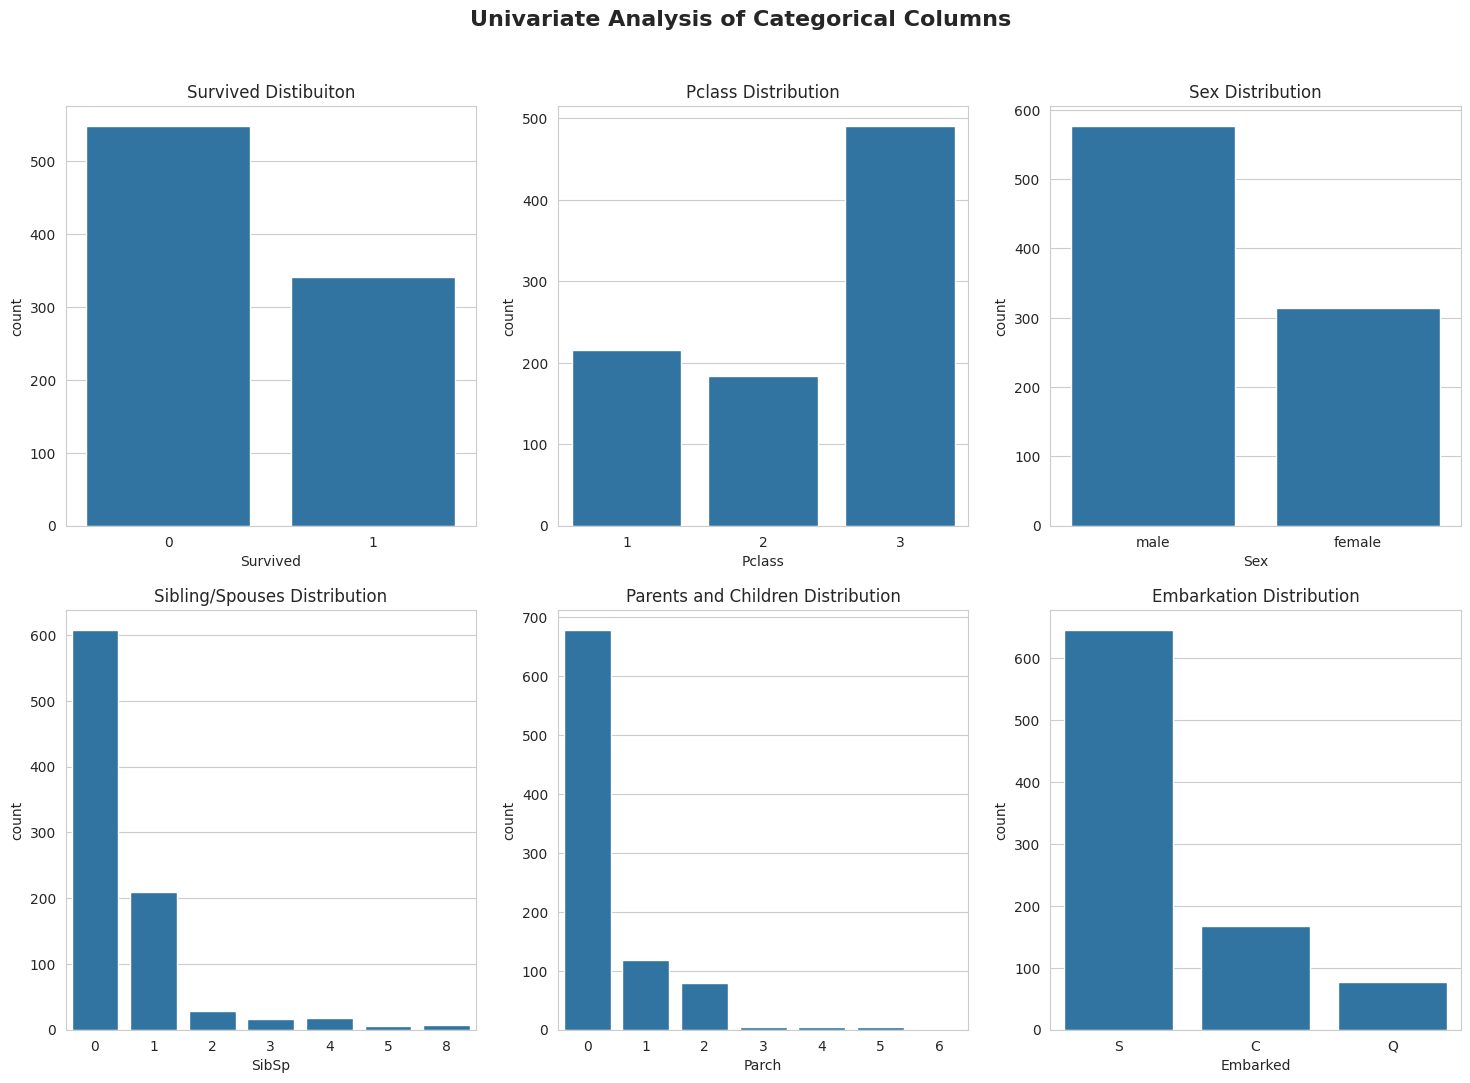

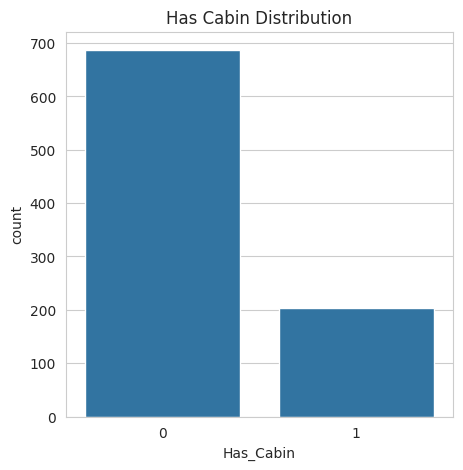

In [66]:
print("Analyzing Categorical Columns:\n")

fig, axes = plt.subplots(2,3, figsize = (18,12))

fig.suptitle("Univariate Analysis of Categorical Columns", fontweight = 'bold', fontsize = 16, y = 0.96)
# countplot Survived
sns.countplot(
    x = "Survived",
    data = tdf,
    ax = axes [0,0]
).set_title("Survived Distibuiton")

#Pclass Distribution 
sns.countplot(
    x = "Pclass",
    data = tdf,
    ax = axes[0,1]
).set_title("Pclass Distribution")

#Sex Distribution 
sns.countplot(
    x = "Sex",
    data = tdf,
    ax = axes[0, 2]
    
).set_title("Sex Distribution")

# SibSp Distribution
sns.countplot(
    x = "SibSp",
    data = tdf,
    ax = axes[1, 0],
).set_title("Sibling/Spouses Distribution")

# Parch Distribution
sns.countplot(
    x = "Parch",
    data = tdf,
    ax = axes[1,1]
).set_title("Parents and Children Distribution")

sns.countplot(
    x = "Embarked",
    data =tdf,
    ax = axes [1,2]
    
).set_title("Embarkation Distribution")

plt.show()

plt.figure(figsize = (5,5))
sns.countplot(
    x = "Has_Cabin",
    data = tdf,
).set_title("Has Cabin Distribution")
plt.show()


#### **Insights of Univariate Analysis** 
**1️⃣ more than 500 passengers didn't surived only around 330 were able to survive**<br>
**2️⃣ most passengers preferred to travel in 3rd Passenger Class due its being cheaper**<br>
**3️⃣ most of the passengers who boarded the ship are males around 580**<br>
**4️⃣ most of the passengers did't have any siblings or spouse travelling with them**<br>
**5️⃣ most of the passengers didn't have any parents or children travelling with them**<br>
**6️⃣ most of the passengers embarked from Southampton**<br>
**7️⃣ very less passengers had a Cabin may be because its expensive**

##### For all the numerical features/columns we use kde/hist plot for univariate analysis

In [67]:
tdf.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  Has_Cabin  
0      0  A/5 21171   7.2500        S          0  
1      0   PC 17599  71.2833        C          1

Analysing Numerical Features


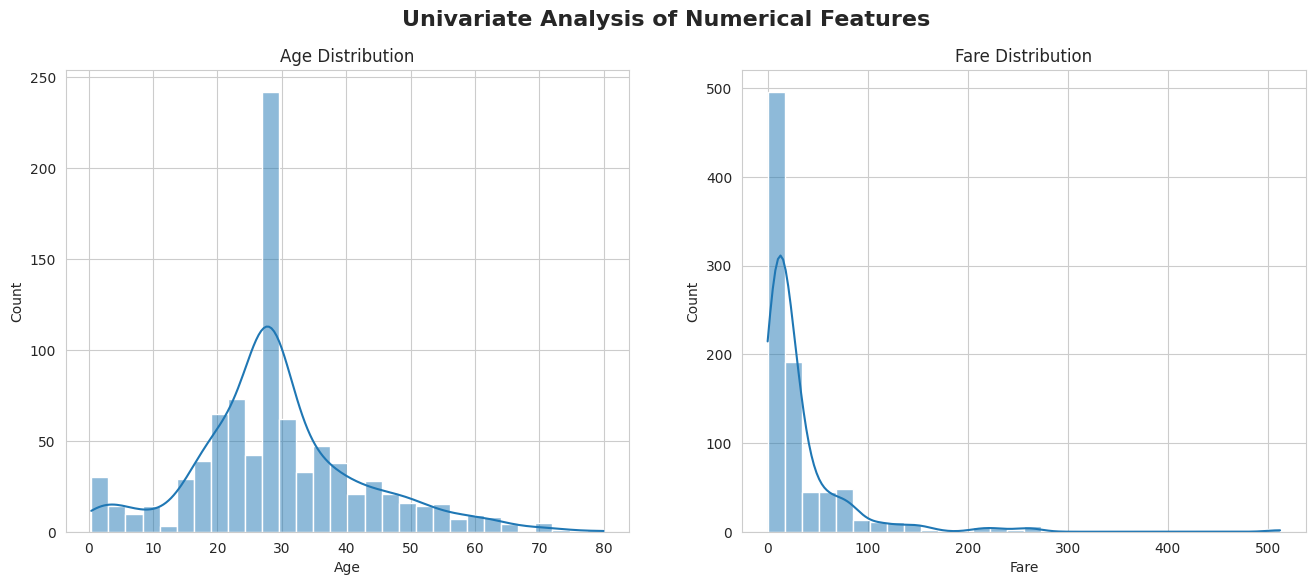

In [68]:
print("Analysing Numerical Features")

fig, axes = plt.subplots(1,2, figsize =  (16,6))

fig.suptitle("Univariate Analysis of Numerical Features", fontweight = 'bold', fontsize = 16)


sns.histplot(
    x = "Age",
    data = tdf,
    bins = 30,
    kde = True,
    # alpha = 0.6,
    # kde_kws = dict(cut=3),
    # edgecolor = (1,1,1,0)
    ax = axes[0]
    
).set_title("Age Distribution")

sns.histplot(
    x = 'Fare',
    data =tdf,
    bins = 30,
    kde = True,
    ax = axes[1]
).set_title("Fare Distribution")

plt.show()

#### **Insights of Univariate Analysis of Numerical Features**

**1️⃣ `Age`: The Distribution of Age peaks around (20-30) basically most of the passenger who boarded the ship were young**<br>
**2️⃣ `Fare`: Fare Distribution peak peaks around (10 to 20) and its heavily Skewed telling most of the tickets purchased were cheap but there are some passengers who belongs to aristocracy they purchased the expensive tickets**

# Step 5: **Bivariate Analysis: Features Vs Survived (Survival Rate)**

In [69]:
tdf.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0

#### **Categorical Columns vs Survived**

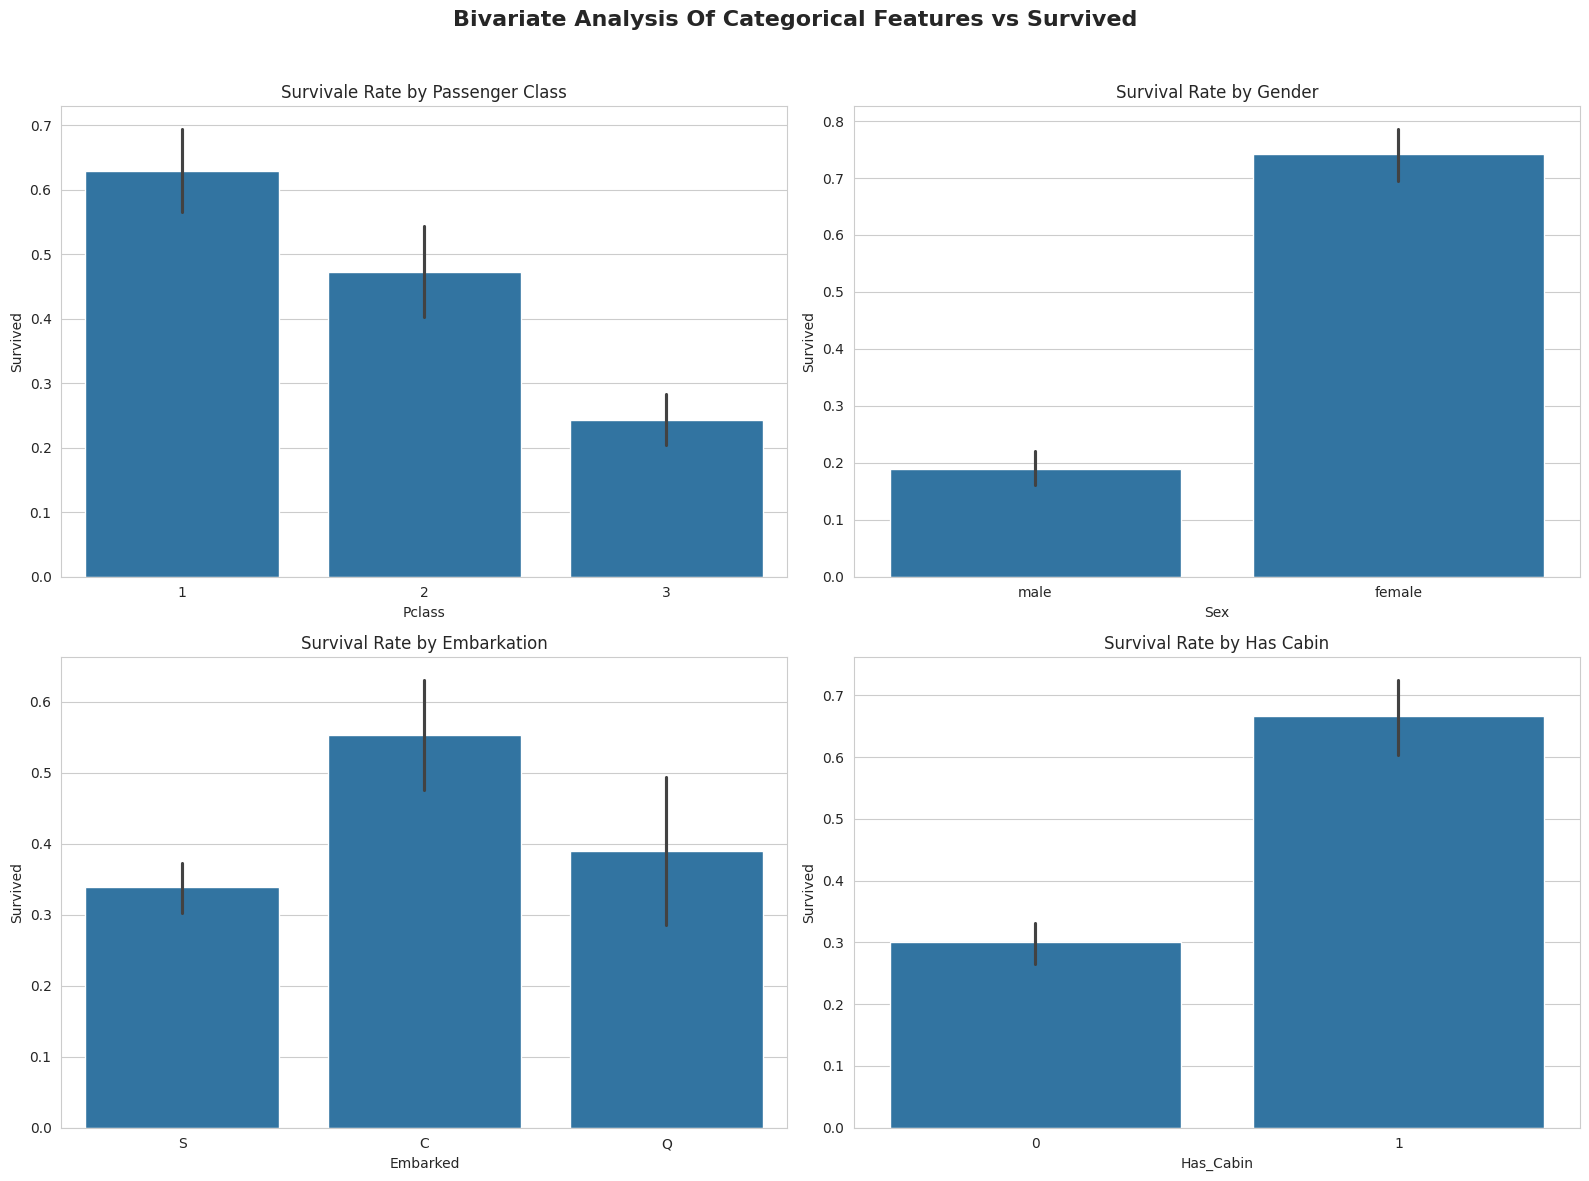

In [70]:
fig, axes = plt.subplots(2,2, figsize = (16,12))

fig.suptitle("Bivariate Analysis Of Categorical Features vs Survived", fontweight = 'bold', fontsize = 16)

# pclass vs survived
sns.barplot(
    x = "Pclass",
    y = "Survived",
    data = tdf,
    ax = axes[0,0]
).set_title("Survivale Rate by Passenger Class")

# sex vs survived
sns.barplot(
    x = "Sex",
    y = "Survived",
    data = tdf,
    ax = axes[0,1]
    
).set_title("Survival Rate by Gender")

# Embarked vs Survived
sns.barplot(
    x = "Embarked",
    y = "Survived",
    data = tdf,
    ax = axes[1,0]
).set_title("Survival Rate by Embarkation")

# Has Cabin vs Survived 
sns.barplot(
    x = "Has_Cabin",
    y = "Survived",
    data = tdf,
    ax = axes[1,1]
).set_title("Survival Rate by Has Cabin")

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

#### **Insights of Bivariate Analysis Categorical Features vs Survived**

**1️⃣ passenger class 1 (aristocracy/ nobles) had a high survival rate of ~ 60% while 2nd class and 3rd class had survival rates of ~ 40% and ~ 25% respectively**<br>
**2️⃣ Females had a survival rate of around 70% atleast while males had 25% atmost**<br>
**3️⃣ Passenger's embarked from `Cherbourg` had a surival rate (~ 45%) of in comparison to other embarkations**<br>
**4️⃣ Passenger's who registered for a cabin were likely to survive as they had a more survial rate (~ 60%) in comparison to passengers not having Cabin (~ 28%)**



#### **Numerical Columns VS Survived**

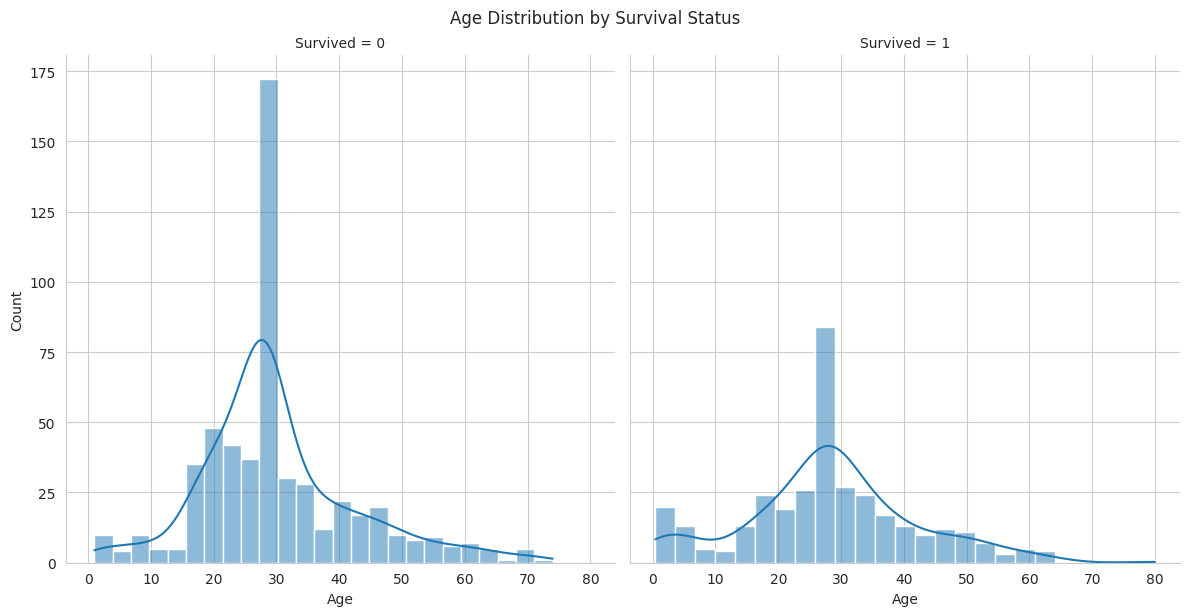

In [71]:
# Age vs Survival

g = sns.FacetGrid(tdf, col = "Survived", height = 6)

g.map(sns.histplot, 'Age', bins = 25, kde = True)

plt.suptitle("Age Distribution by Survival Status", y = 1.02)

plt.show()

#### **Insights of Bivariate analysis of Age vs Survived**

1️⃣ **young children of age between 1 and 10 had a higher chance of survival**<br>
2️⃣ **most of the young men of age between 20 to 30 weren't able to survive**<br>
3️⃣ **all the elderly and even the passenger of age 80 wasn't able to survive**<br>


#### 🌟🌟🌟 NOTE

1️⃣ **What sns.FacetGrid is :**

**`FacetGrid` is a Seaborn object that makes a grid of subplots (small multiple plots) from a single dataframe.**

**Think of it as: “split the dataset into groups and give me the same plot for each group, arranged in a grid.”**

**Meaning of Facet: one part or particular aspect of something here in python we can one group**

2️⃣ **What .map() does :**

**`.map()` tells the FacetGrid: “On each subplot, draw this plotting function using the subset of the dataframe for that facet.”**

**It applies sns.histplot separately to each subset (e.g., Survived == 0 subset, and Survived == 1 subset).**

#### ➡️ **Because of Fare being highly skewed Even if survivors generally paid more, that subtle difference is lost in the skew — both histograms will look almost identical on the left and flat on the right.**

➡️ **Fare is not evenly distributed across classes**

**Fare is correlated with Passenger Class (Pclass).**

**Higher fare → 1st class → higher chance of survival.**

**So, Fare itself isn’t the true cause of survival — class and cabin access were.**

**Plotting Fare alone hides that deeper relationship.**

### So we are doing Outlier Detection in Fare since the Fare itself isn't the true cause of surivial rather it was passengers class and access to cabin

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


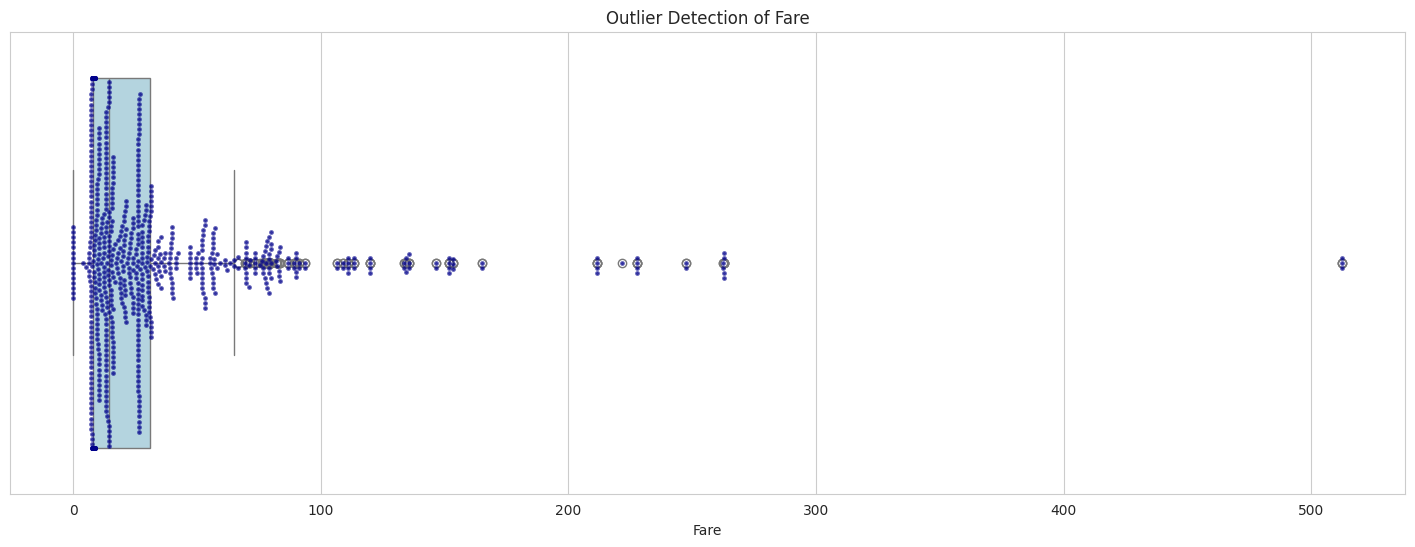

In [72]:
plt.figure(figsize = (18, 6))
plt.title("Outlier Detection of Fare")
# plt.xlim(left = -50, right = 200)

sns.boxplot(
    x = "Fare",
    data = tdf,
    color = "lightblue",
    # alpha = 0.6,
    width = 0.8,
    
)

sns.swarmplot(
    x = "Fare",
    data = tdf,
    color = "darkblue",
    alpha = 0.6,
    linewidth= 1.5,
    edgecolor= 'darkblue',
    size = 2
)

plt.show()

#### **Insights**
**1️⃣ most of the fares are concentrated under $100**<br>
**2️⃣ There were many rich aristocrats on the ship who payed Fare even more than $500**<br>

# Step6: Feature Engineering

#### **Theoretical Concept: Feature Engineering**
Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. A good feature should be relevant to the problem and easy for a model to understand.

**Common Techniques:**
1.  **Combining Features:** Creating a new feature by combining others (e.g., `SibSp` + `Parch` = `FamilySize`).
2.  **Extracting from Text:** Pulling out specific information from a text feature (e.g., extracting titles from the `Name` column).
3.  **Binning:** Converting a continuous numerical feature into a categorical one (e.g., binning `Age` into groups like 'Child', 'Adult', 'Senior').

In [80]:
# creating a Family_Size  feature
tdf["FamilySize"] = tdf["SibSp"] + tdf["Parch"] + 1 # +one for the person themselves

#creating a IsAlone Feature
tdf["IsAlone"] = np.where(tdf["FamilySize"] == 1, 1, 0) #1 for is Alone and 0 for not Alone

# # another method
# tdf["IsAlone"] = 0
# tdf.loc[tdf["FamilySize"] == 1, "IsAlone"] = 1

print("Created `FamilySize` and `IsAlone` Features: ")
tdf[["FamilySize", "IsAlone"]].head()



Created `FamilySize` and `IsAlone` Features: 


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

#### **Analyzing the new Family-Related Features against survival**

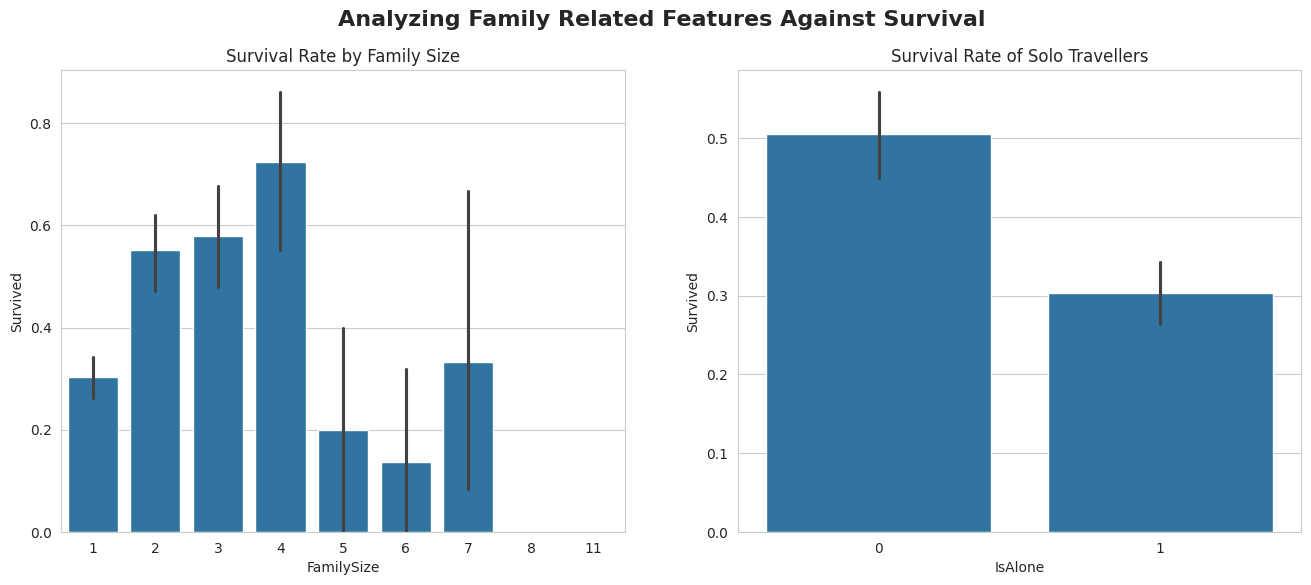

In [81]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))

fig.suptitle("Analyzing Family Related Features Against Survival", fontweight = 'bold', fontsize = 16)

sns.barplot(
    x = "FamilySize",
    y = "Survived",
    data = tdf,
    ax = axes[0]
    
).set_title("Survival Rate by Family Size")

sns.barplot(
    x = "IsAlone",
    y = "Survived",
    data = tdf,
    ax = axes[1]
).set_title("Survival Rate of Solo Travellers")

plt.show()

#### **Insights of Family Related Feature plot**

1️⃣ **small family of 2 to 4 members had more survival rate than others**<br>
2️⃣ **families with members more than 4 had poor survival incomparison to small families may be because in such situation its become hard to escape in large groups**<br>
3️⃣ **families especially comprised of 4 members had best chance of survival among all other family sizes**<br>
4️⃣ **Solo Passengers had a very low rate(alomst half) in comparison with those who are travelling with their families/friends**<br>

### **Now Extracting Useful Information which is hidden in plain sight**

In [82]:

# Extracting titles from the Name column
tdf["Title"] = tdf["Name"].str.extract(r' ([A-Za-z]+)\.', expand = False)

# Lets see the different titles
print("Extracted Titles:")
tdf["Title"].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

#### NOTE FOR ABOVE 

* Matches a space.
* Titles in the names are usually preceded by a space.
([A-Za-z]+): This is the capturing group.
* [A-Za-z]+: Matches one or more uppercase or lowercase letters. This captures the title itself (like Mr, Mrs, Miss, etc.).
* \.: Matches a literal dot (.) which usually follows the title.

#### **Simplifying the titles by grouping rare ones into a Rare Category**

In [83]:
tdf['Title'] = tdf['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')


In [84]:
tdf["Title"] = tdf["Title"].replace('Mlle', 'Miss')
tdf["Title"] = tdf["Title"].replace("Ms", 'Miss')
tdf["Title"] = tdf["Title"].replace("Mme", "Mrs")

#### **Now Bivariate Analysis of Title by Survived**

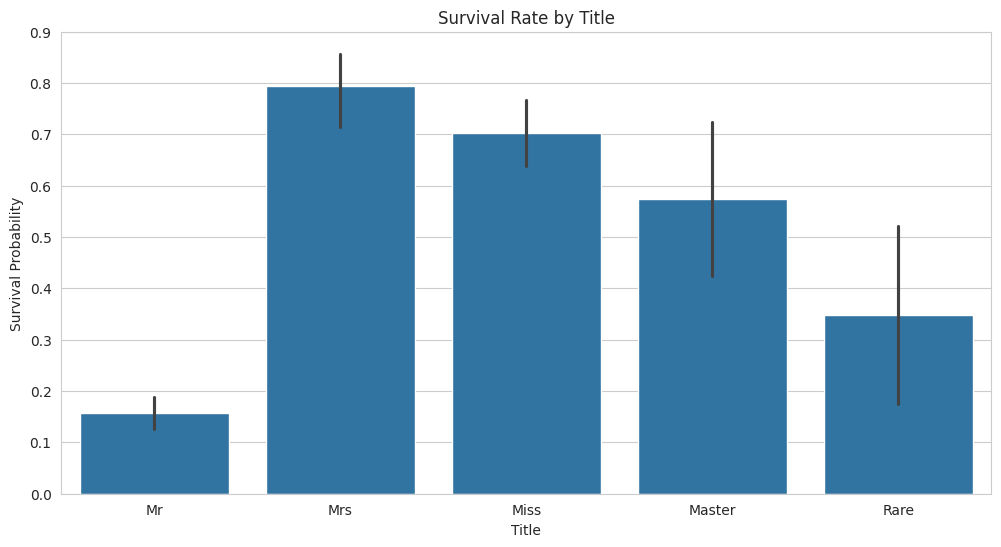

In [85]:
plt.figure(figsize = (12, 6))
sns.barplot(
    x = "Title",
    y = "Survived",
    data = tdf,
)

plt.title("Survival Rate by Title")
plt.ylabel("Survival Probability")

plt.show()

#### **Insights**

1️⃣ **Both 'Mrs' and 'Miss'(Females) had high survival rates while on the other males married males (Mr) had a very low Survival Rate in comparison to any other**<br>

2️⃣ **Even in case of unmarried young females (Miss) had a better survivability in comparison to young masters**<br>

3️⃣ **But still young masters (Master) had a better survivability than the married males (Mr)**<br>

4️⃣ **Rare titles often associated with nobility or status, also had a mixed but generally higher survival rate than common men.**<br>

## Step 7: Multivariate Analysis

### **Survival Rate by Passenger Class and Sex**

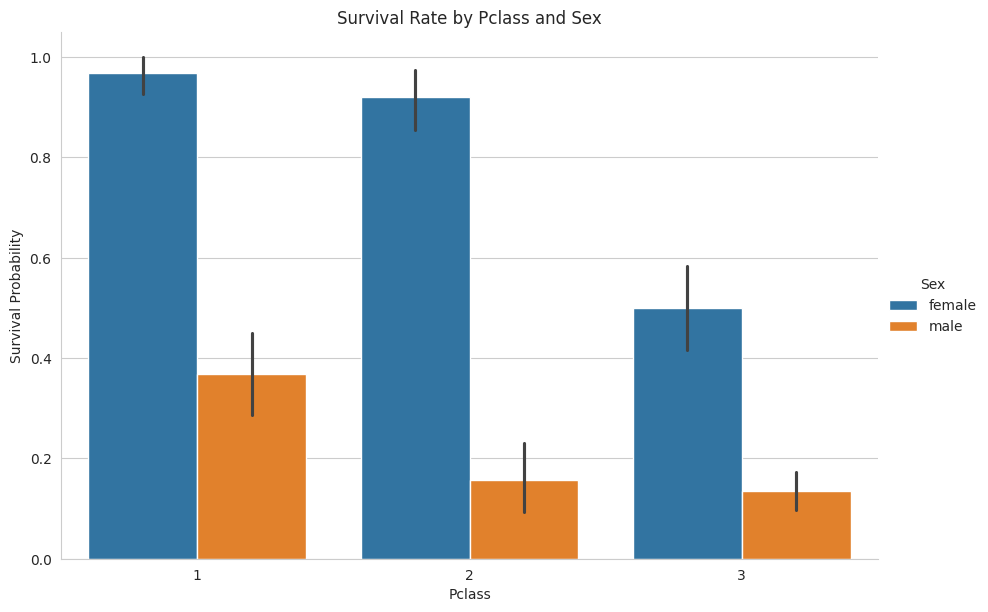

In [90]:
sns.catplot(
    x = "Pclass",
    y = "Survived",
    hue = "Sex",
    data = tdf,
    kind = 'bar',
    height = 6,
    aspect = 1.5
)

plt.title("Survival Rate by Pclass and Sex")
plt.ylabel("Survival Probability")
plt.show()

#### **Insights**

1️⃣ **Females of PClass 1 and 2 had almost equal chances of Survival ~ 90%**<br>
2️⃣ **males of Pclas 1 had a better chances of survival in comparison to any other males belonging to other Pclasses**<br>
3️⃣ **Overall Females belonging to any passenger class had a better survival chances**<br>

### **Violin plot to see age distribution by sex and survival status**

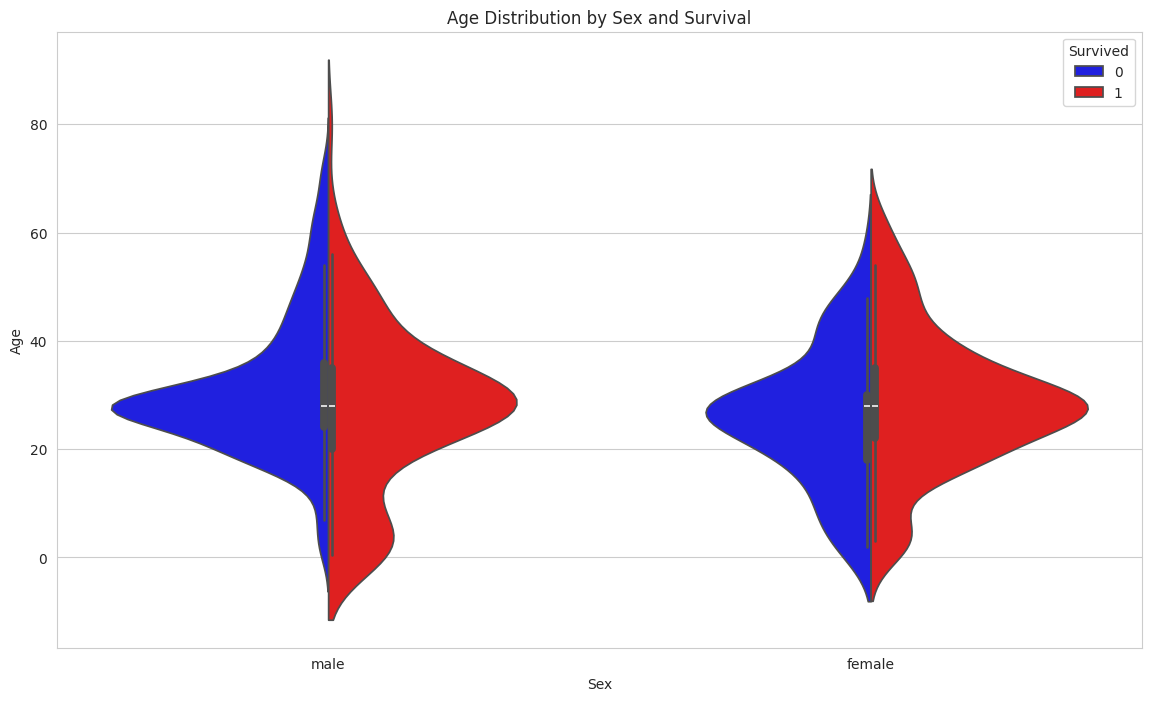

In [92]:
plt.figure(figsize = (14, 8))
sns.violinplot(
    x = "Sex", 
    y = "Age",
    hue = "Survived",
    data = tdf,
    split = True,
    palette = {0: 'blue', 1:'Red'}
    
)

plt.title("Age Distribution by Sex and Survival")
plt.show()

#### **Insights from violin Plot**

1️⃣ **For Males the initial peak for survivors is at a very young age around 1 to 10 years old and the second peak comes at around 20 to 30 years old most of them might be adult aristocrat males**<br>
2️⃣ **Most of the Non-Suriviors in Males peak also comes around 20 to 30 years those are common men who couldn't afford their own safety unlike nobles**<br>
3️⃣ **Similar to males the first peaks of female survivors comes around 1 to 10 years and second peak of female surviors comes aroudn 20 to 40 years which more broader range of age incomparison to males indicating the females across most of the age groups had better chance of survivability**<br>
4️⃣ **Most of female Non-survivors just like males were of age around 20 to 30**<br>

# step 8: Correlation Analysis

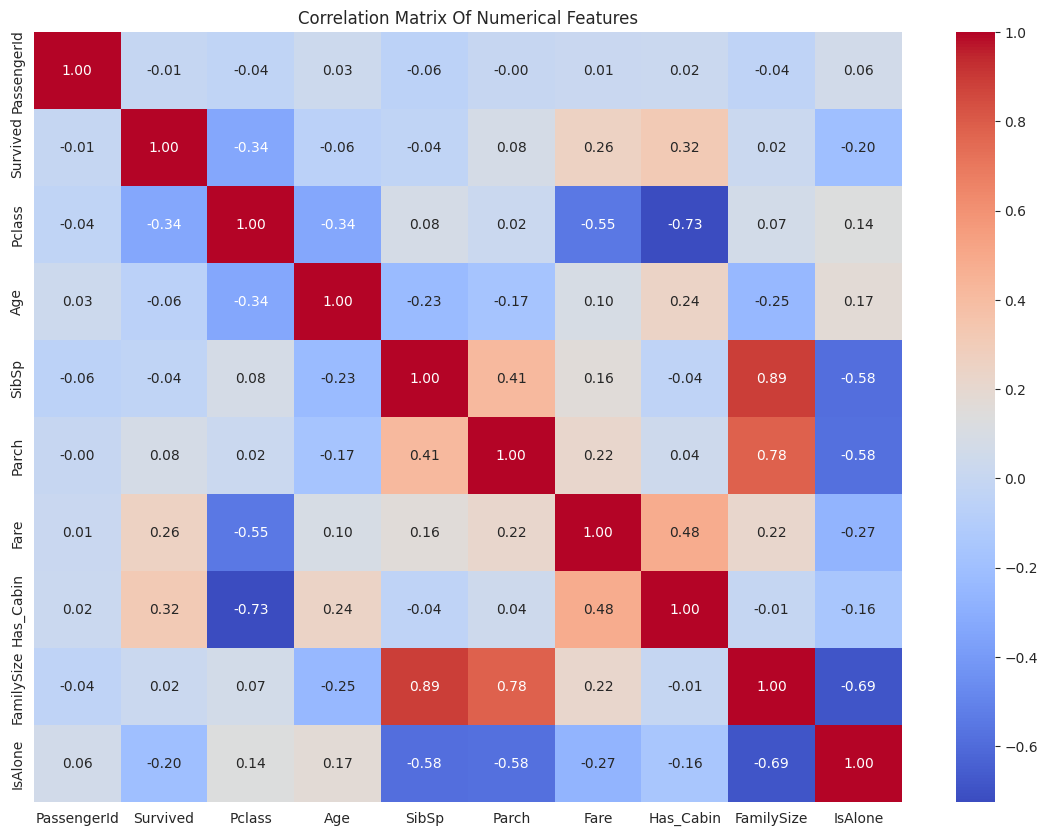

In [ ]:
# Correlation Matrix for numerical features

plt.figure(figsize = (14, 10))

num_cols = tdf.select_dtypes(include = np.number).columns.tolist()
sns.heatmap(
    data = tdf[num_cols].corr(),
    annot = True,
    cmap  = 'coolwarm',
    fmt = '.2f'
)
plt.title("Correlation Matrix Of Numerical Features")
plt.show()

#### **Interpretation Of Heatmap:**
1️⃣ **Survived has a positive correlation with `Fare` and `Has_Cabin` Features, And a negative Correlation with `Pclass` and `IsAlone` as we know that Plcass has class 2 and class 3 and most of those classes has very less survivability thats why negatively correlated similarly All the Solo Passengers has a very less Survivability thats why negatively correlated with Survived**

2️⃣ **PClass and Fare are strongly negatively correlated which makes sense (1st class = high Fare , 3rd class = low Fare**

3️⃣ **Since FamilySize if composed of Parch and SibSp thats why these features are highly correlated with FamilySize**

# Step 9 : Y-Data Profiling

In [99]:
from ydata_profiling import ProfileReport

profile = ProfileReport(tdf, title = "Titanic Dataset Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 113975.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
profile.to_file("Titanic_Dataset_Y_Data_Profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Step 10: Final Conclusion and Summary of Insights

This end-to-end EDA has provided a deep understanding of the Titanic dataset. Our analysis confirms the "women and children first" narrative and highlights the stark social inequalities of the time. Through feature engineering, we've created even more powerful predictors for a potential machine learning model.

**Key Findings:**
1.  **Strongest Predictors of Survival:**
    - **Title & Sex:** Being female ('Mrs', 'Miss') was the single most significant advantage. Our engineered `Title` feature captures this nuance better than `Sex` alone, also showing that young boys ('Master') had a much higher survival rate than adult men ('Mr').
    - **Passenger Class:** There was a clear survival hierarchy: 1st > 2nd > 3rd class.
    - **Age:** Children and infants had a higher survival rate.

2.  **Other Influential Factors:**
    - **Family Size:** Traveling in a small family (2-4 members) increased survival chances, while traveling alone or in a very large family decreased them.
    - **Fare/Cabin:** Having a cabin (and thus paying a higher fare) was strongly correlated with survival, acting as a proxy for wealth and passenger class.
    - **Port of Embarkation:** Passengers from Cherbourg ('C') had a higher survival rate, possibly because a higher proportion of them were in 1st class.

These insights are fundamental for the next step in the data science pipeline: building a predictive machine learning model to forecast survival.